In [65]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
%matplotlib inline
from matplotlib.colors import LogNorm

I'm curious whether there's a pattern in the data, e.g. which cells are more likely to be living

The chance of having surviving neighbours around you is larger towards the middle, how dependent is the world size here and are there hotspots

4 datasets:
1. `smallData.npy` (10, 10) world, 50 generations per epoch, 10 epochs
2. `largeData.npy` (100, 100) world, 50 generations per epoch, 10 epochs
3. `longData.npy` (20, 20) world, 50 generations per epoch, 100 epochs
4. `longLargeData.h5` (100, 100) world, 50 generations per epoch, 100 epochs


## TO DO
* Calculate probability of being alive per cell
* Plot probabilities as a heatmap
* Plot total sum of living (=1) as a heatmap

Starting with `smallData.npy`

In [38]:
smallData = np.load('smallData.npy')

In [67]:
def plotGameOfLife(data, log=False):
    print('Total data size:')
    print(data.shape)
    print('Size per epoch:')
    print(data[0].shape)
    totalSum = 0
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            totalSum += data[i][j]

    totalProb = totalSum / (data.shape[0] * data.shape[1])
    
    figSizeY = 10 + (data.shape[2] / 10)
    figSizeX = 10 + (data.shape[3] / 10)
    
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (figSizeX,figSizeY))
    if not log:
        sns.heatmap(totalProb, ax=ax1, square=True, cbar=None)
        sns.heatmap(totalSum, ax=ax2, square=True, cbar=None)
    else:
        sns.heatmap(totalProb, ax=ax1, square=True, cbar=None, norm=LogNorm(vmin=data.min(), vmax=data.max()))
        sns.heatmap(totalSum, ax=ax2, square=True, cbar=None, norm=LogNorm(vmin=data.min(), vmax=data.max()))

    ax1.set_title('Total probability')
    ax2.set_title('Total sum')
    plt.tight_layout()

Total data size:
(10, 51, 10, 10)
Size per epoch:
(51, 10, 10)


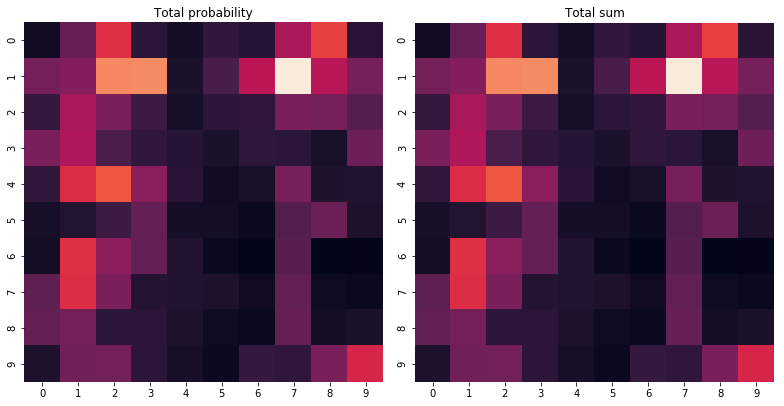

In [68]:
plotGameOfLife(smallData)

Total data size:
(10, 51, 100, 100)
Size per epoch:
(51, 100, 100)


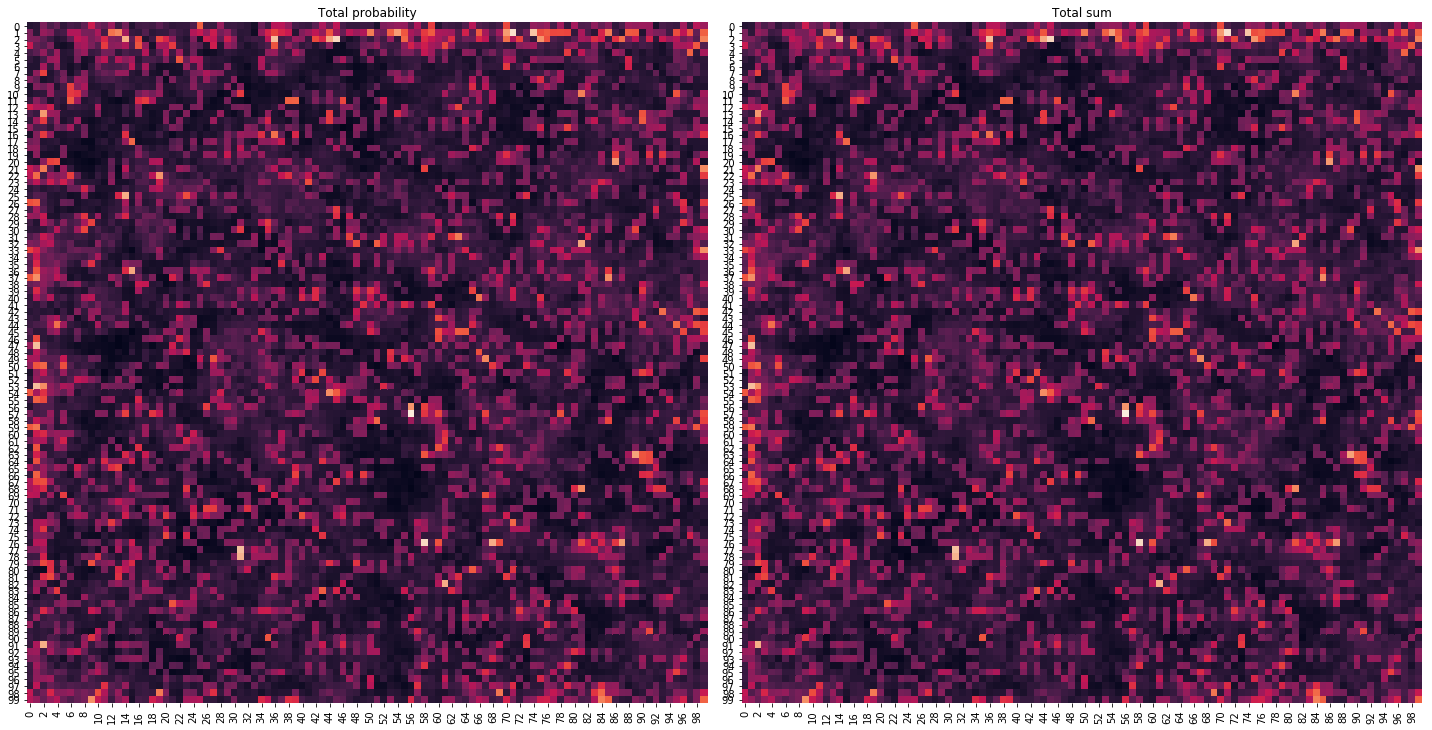

In [56]:
largeData = np.load('largeData.npy')
plotGameOfLife(largeData)

Total data size:
(100, 51, 20, 20)
Size per epoch:
(51, 20, 20)


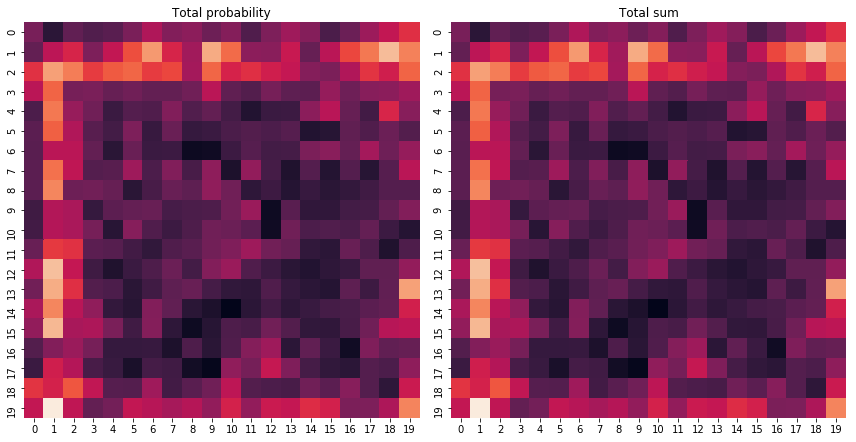

In [57]:
longData = np.load('longData.npy')
plotGameOfLife(longData)

Alright now time for longLargeData

Total data size:
(100, 51, 100, 100)
Size per epoch:
(51, 100, 100)


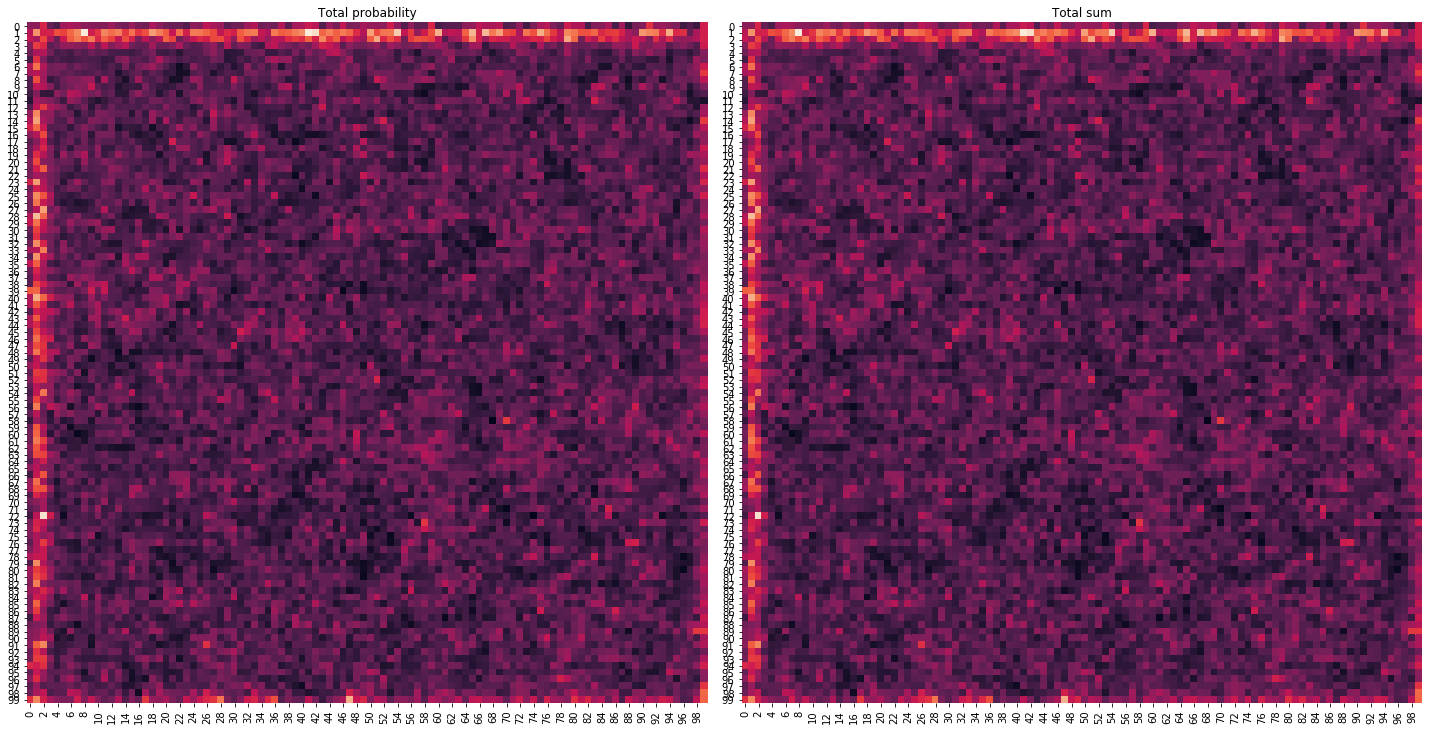

In [64]:
with h5py.File('longLargeData.h5', 'r') as file:
    longLargeData = np.array(file.get('longLargeData'))

plotGameOfLife(longLargeData)

Total data size:
(100, 51, 100, 100)
Size per epoch:
(51, 100, 100)


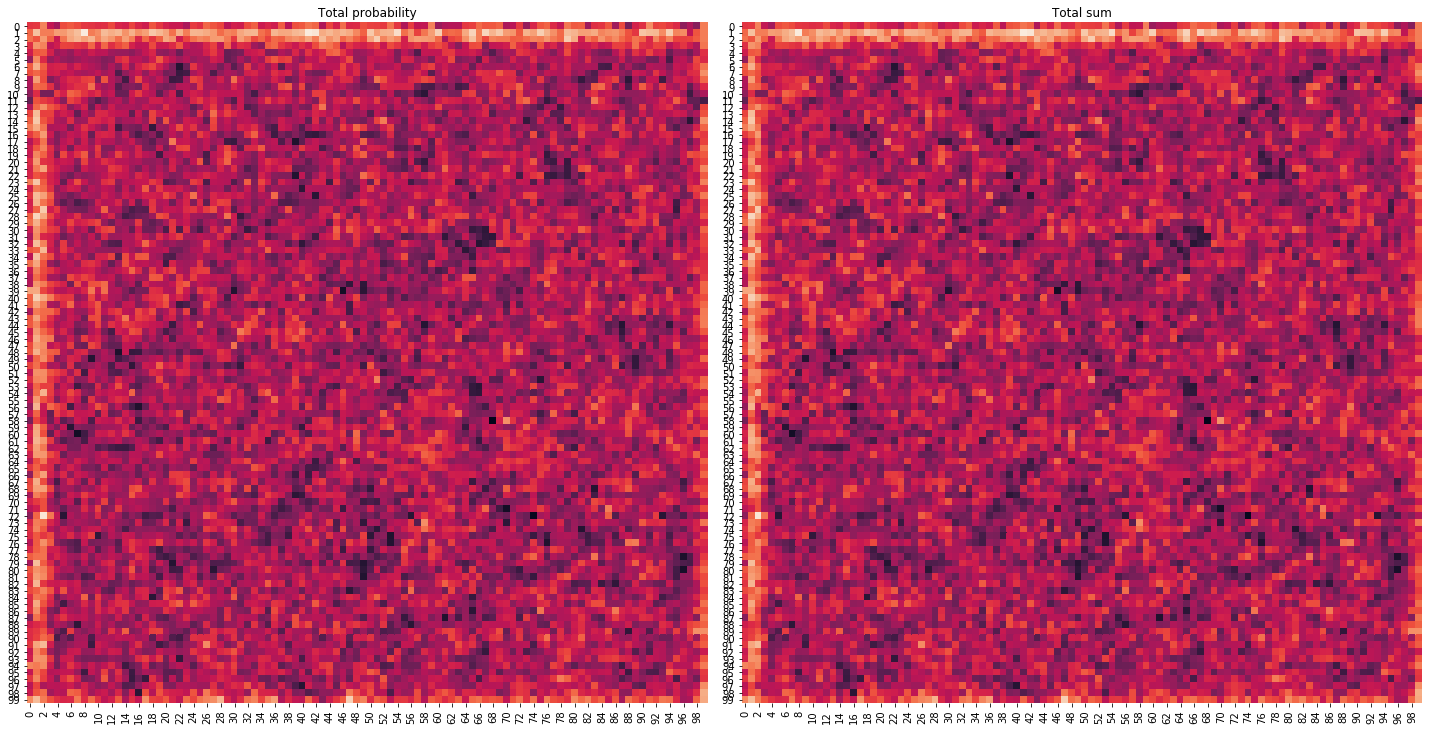

In [69]:
plotGameOfLife(longLargeData, log=True)